# DMA Coursework
## H1N1 and Seasonal Flu Vaccines Prediction

### Import Libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading dataset into dataframe

In [2]:
#open training-labels.csv as dataframe
df1 = pd.read_csv('training_set_labels.csv')
#open training-values.csv as dataframe
df2 = pd.read_csv('training_set_features.csv')

### Merge label columns into a single column for vaccine

In [3]:
df1['vaccine'] = df1['h1n1_vaccine'] | df1['seasonal_vaccine']
df1.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1, inplace=True)

In [4]:
#merge the two dataframes and remove respondent_id column
df = pd.merge(df1, df2, on='respondent_id')
df = df.drop('respondent_id', axis=1)
df.head()

,vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


## Data Exploration

### Descriptive Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   vaccine                      26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

### Convert data to object and describe

In [6]:
df = df.astype('object', copy=False)
df.describe()

,vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,26707,26615.0,26591.0,26636.0,26499.0,26688.0,26665.0,26620.0,26625.0,26579.0,...,22284,25299,24665,25244,26707,26707,26458.0,26458.0,13377,13237
unique,2,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3,2,2,3,10,3,4.0,4.0,21,23
top,1,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo
freq,13412,10575.0,14598.0,25335.0,19228.0,24847.0,22015.0,17073.0,17644.0,18001.0,...,12777,13555,18736,13560,4297,11645,14474.0,18672.0,2468,1778


### Get information about the dataset

In [7]:
print("Number of independent features: " + str(len(df2.columns)-1))
print("Number of dependent features: " + str(len(df1.columns)-1))
print("Number of data samples: " + str(len(df.index)))
print("Column headings: \n" + str(df.columns))
#get names of columns in df3
col_names = df.columns
#get unique values of every column in df3
for i in range(1, len(col_names)):
    print(col_names[i], ": ", df[col_names[i]].unique())

Number of independent features: 35
Number of dependent features: 1
Number of data samples: 26707
Column headings: 
Index(['vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')
h1n1_conce

### Visualise the distribution of every value with the labels

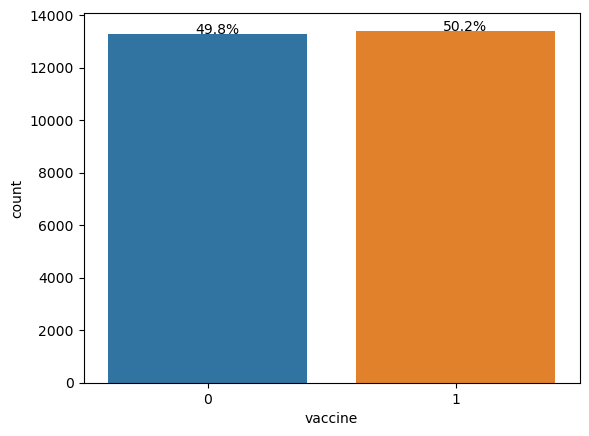

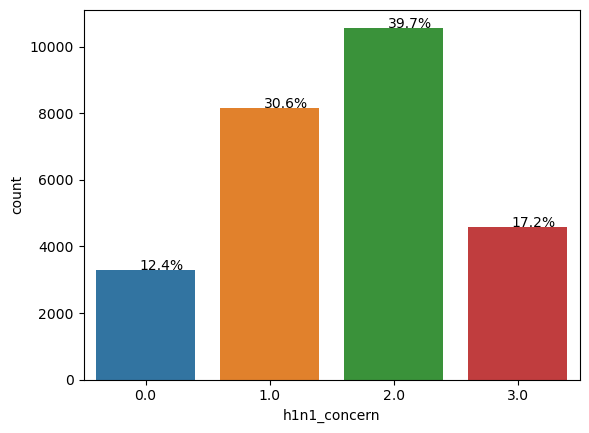

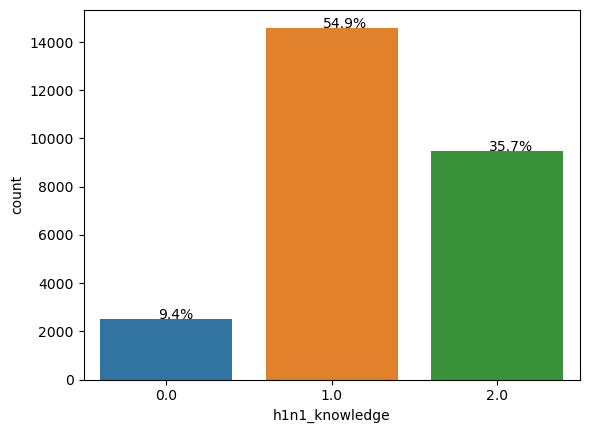

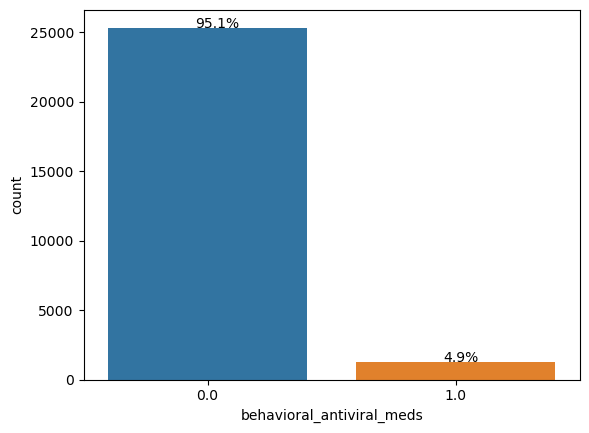

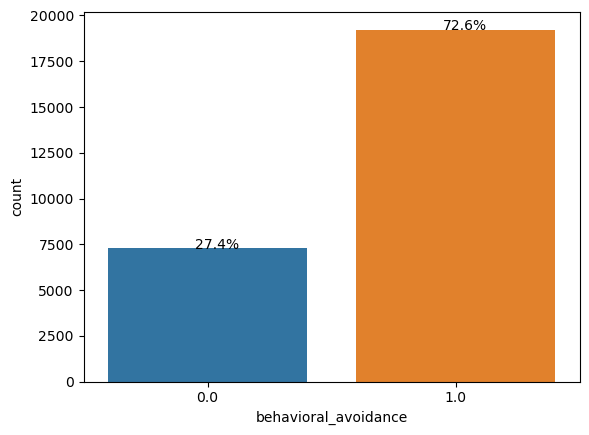

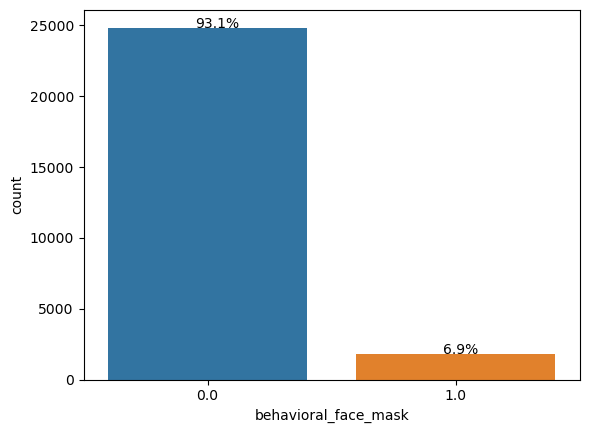

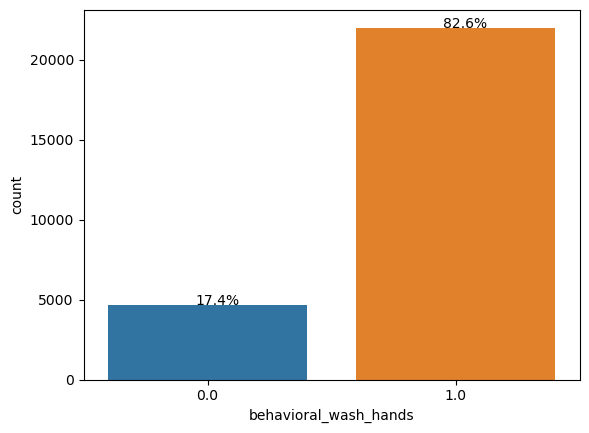

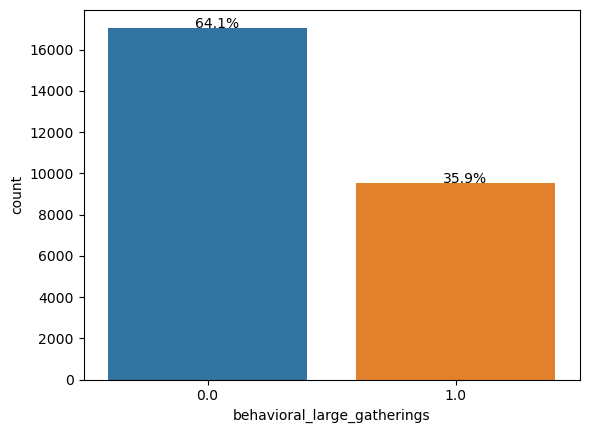

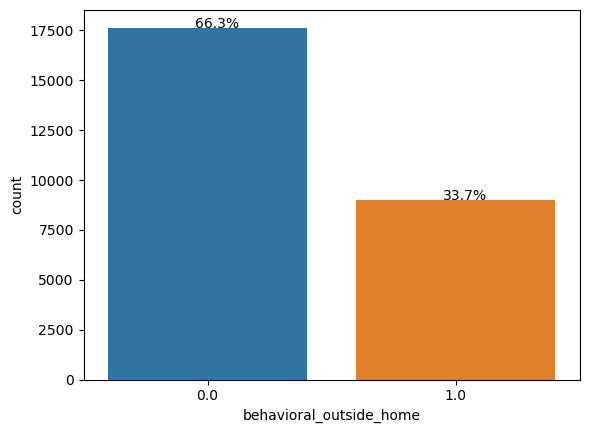

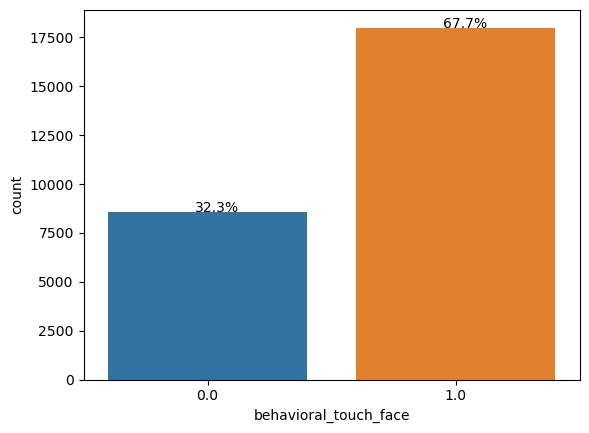

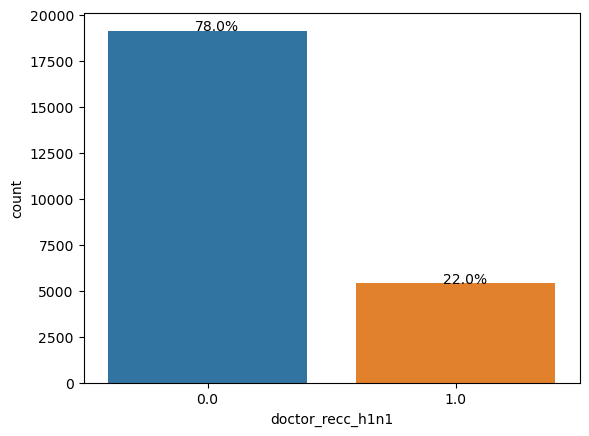

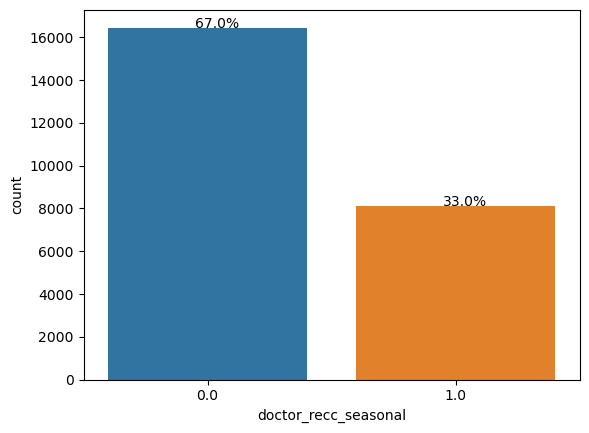

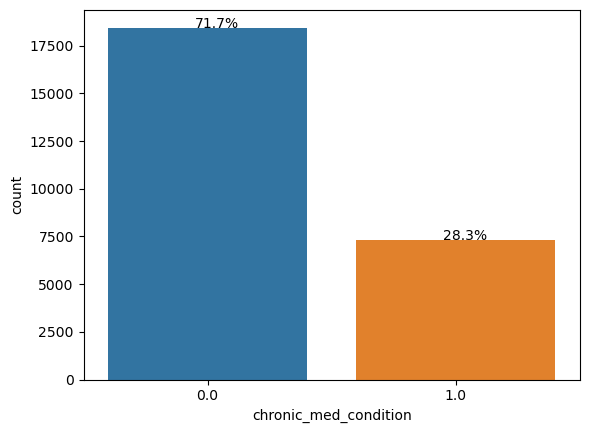

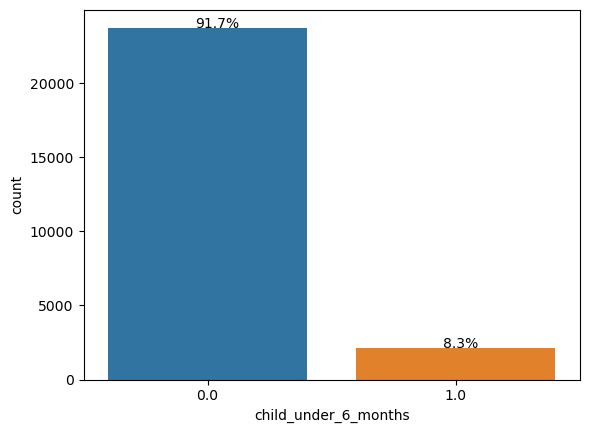

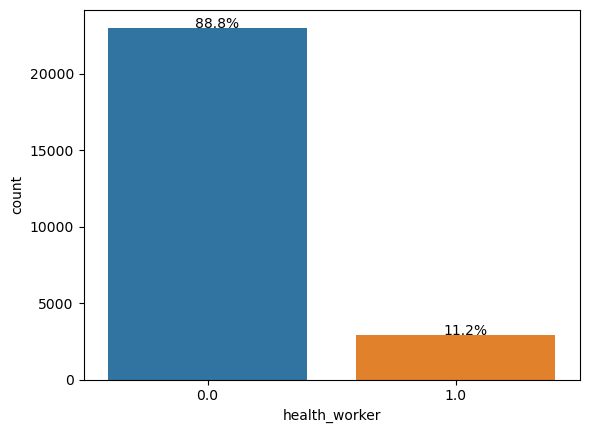

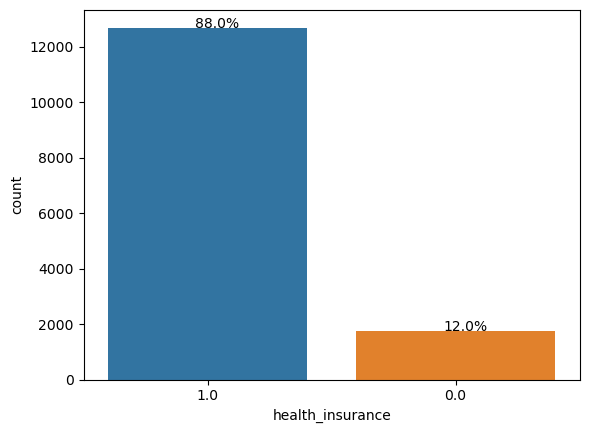

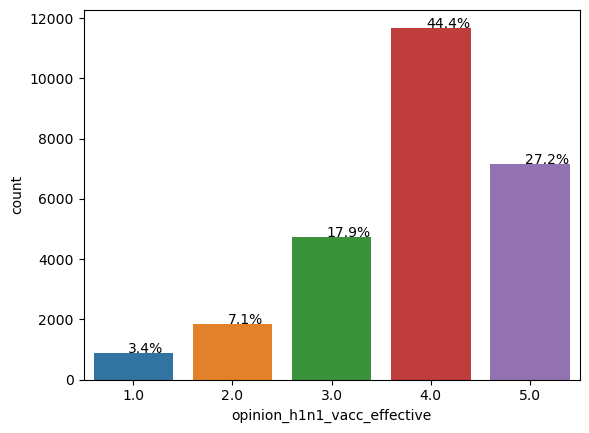

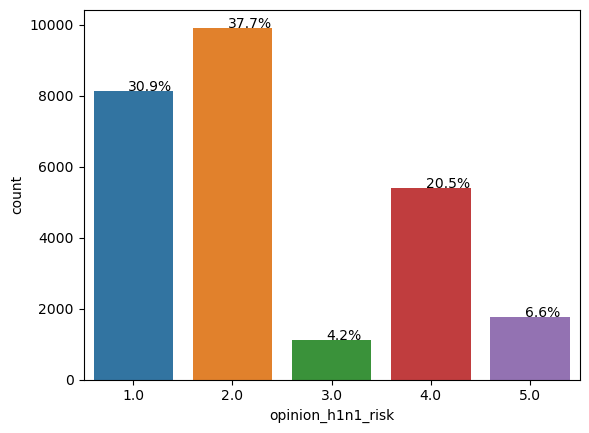

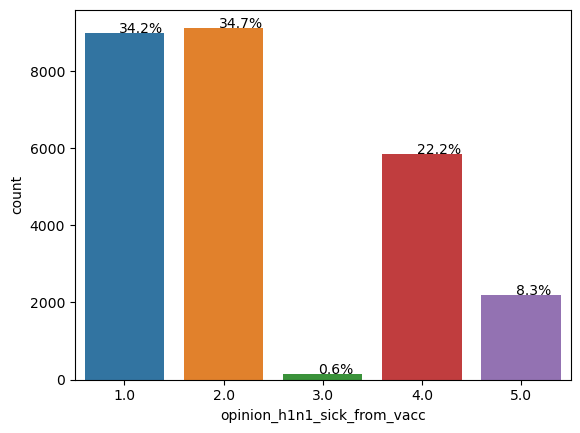

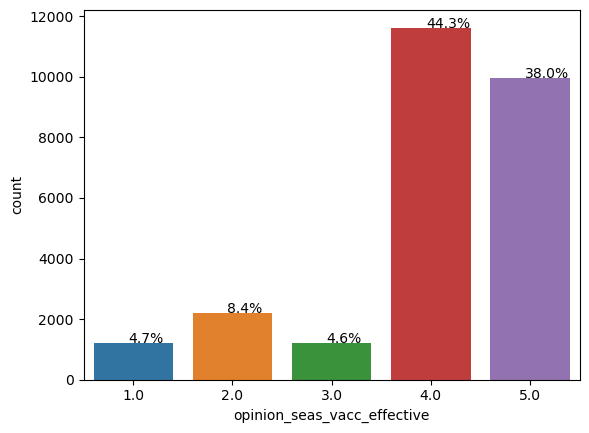

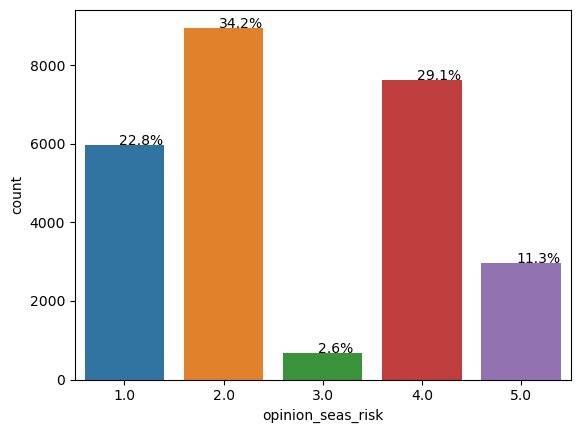

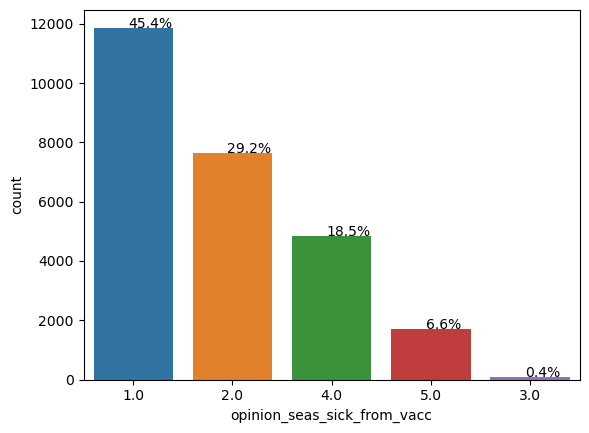

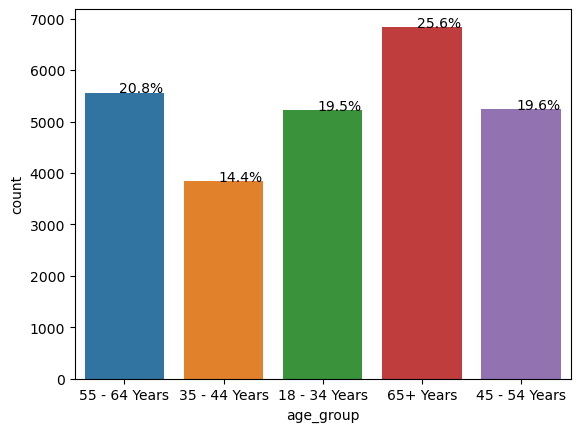

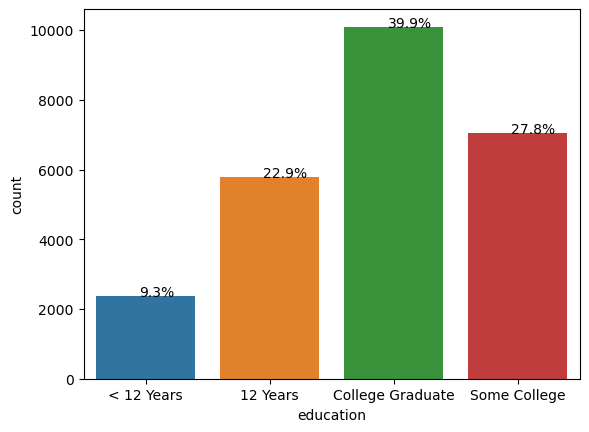

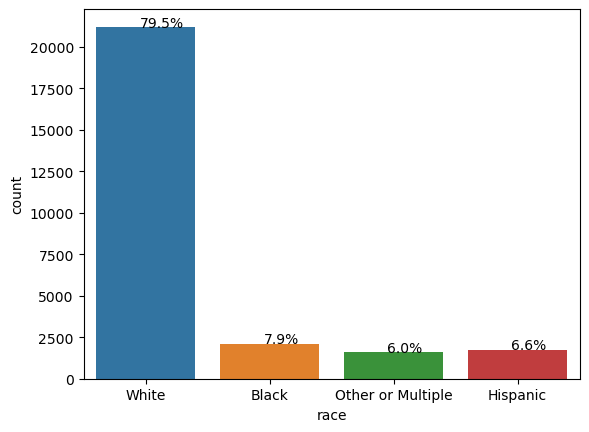

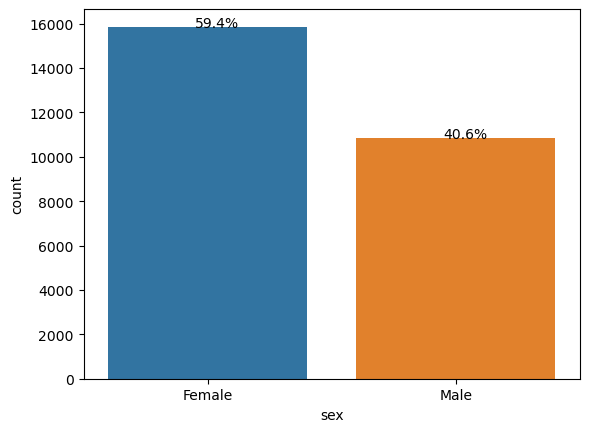

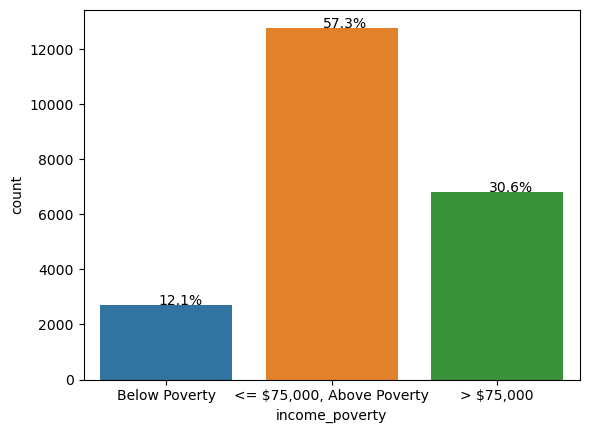

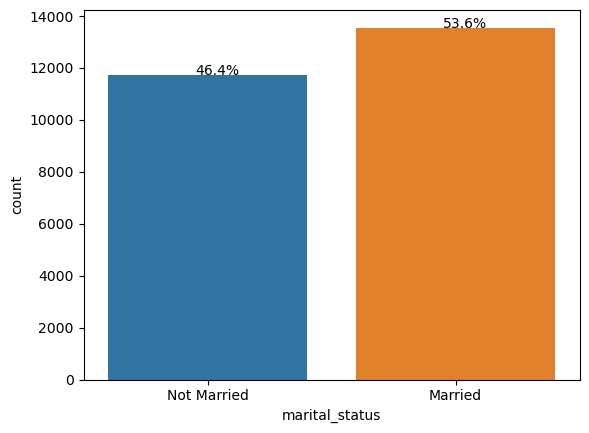

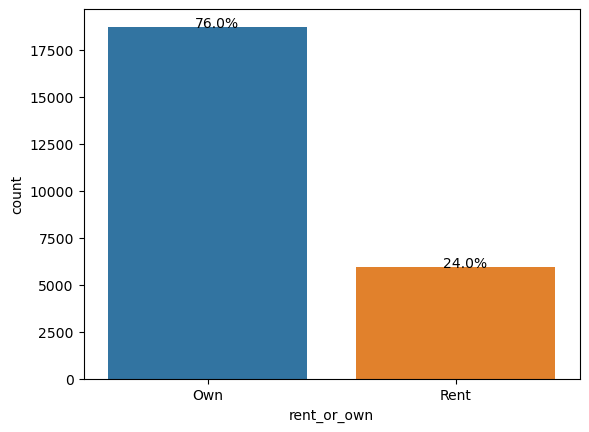

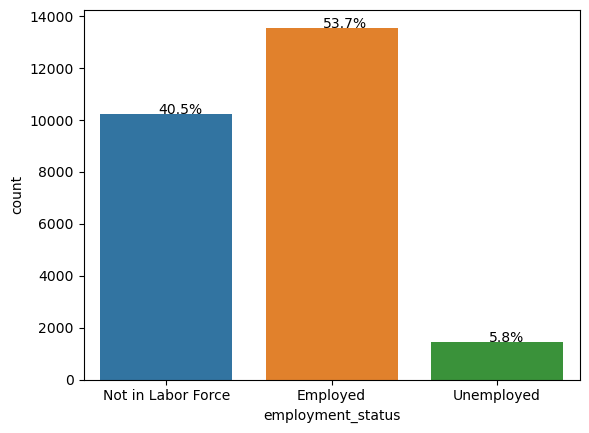

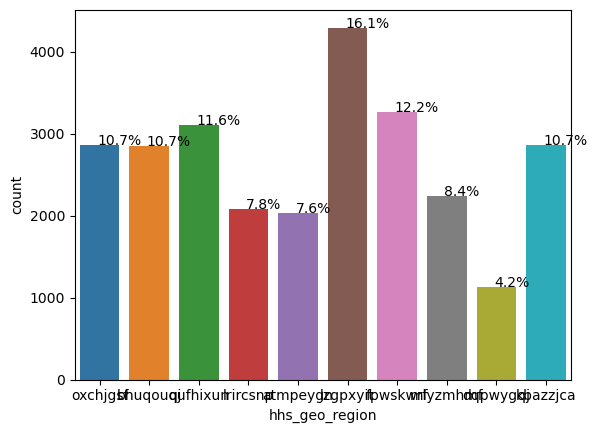

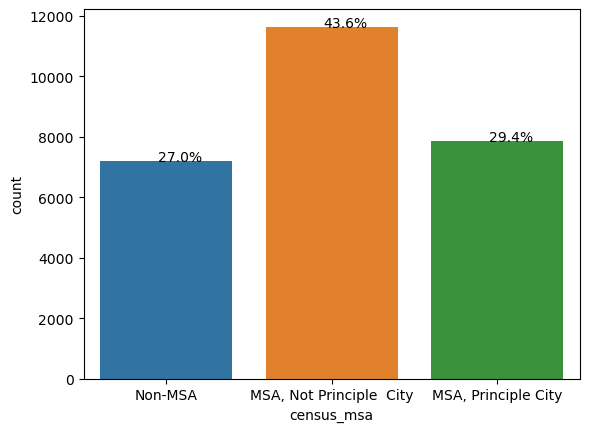

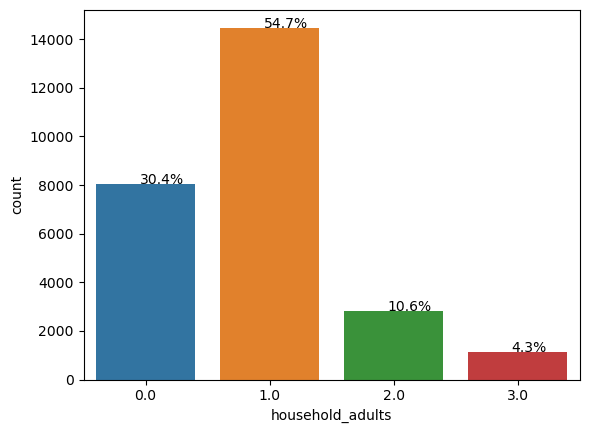

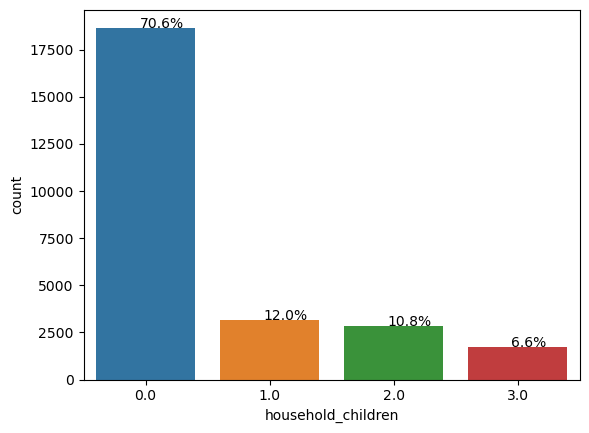

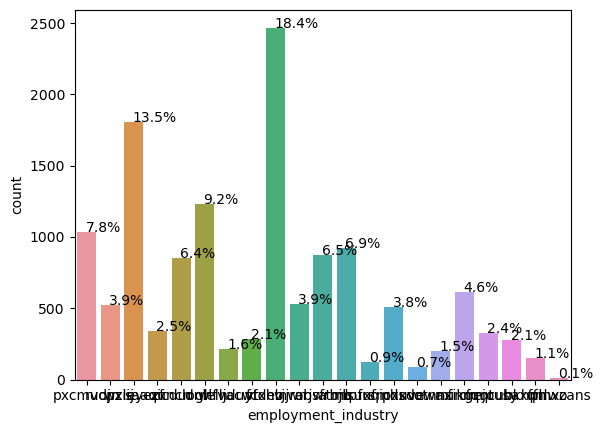

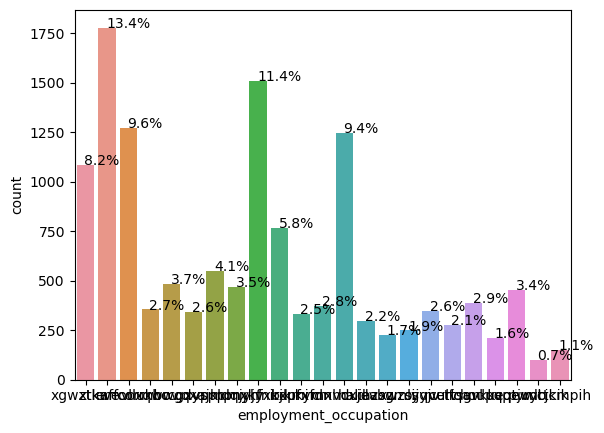

In [8]:
num_cols = len(df.columns)
col_names = df.columns
for i in range(0, num_cols):
    ax = sns.countplot(x=col_names[i], data=df)
    total = len(df[col_names[i]].dropna())
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
    plt.show()
    

### With null values

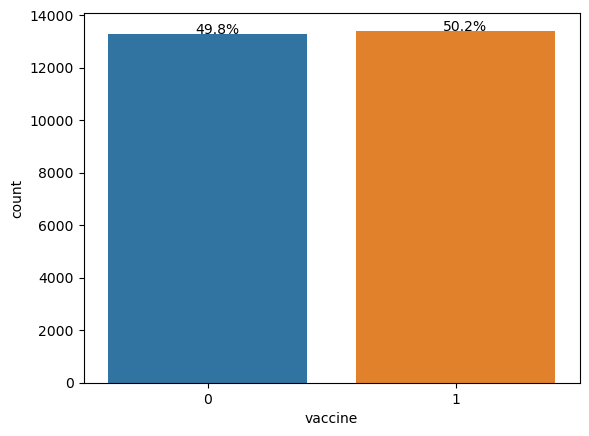

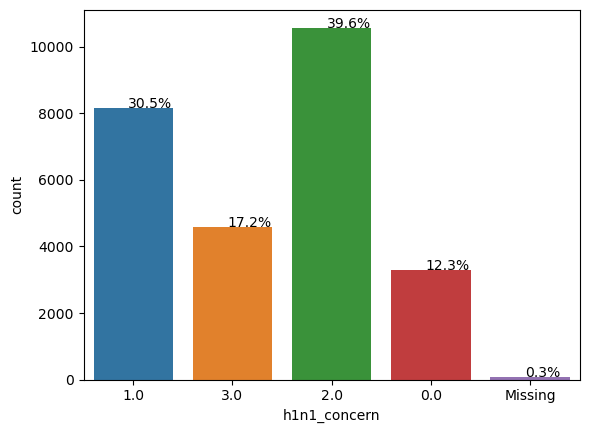

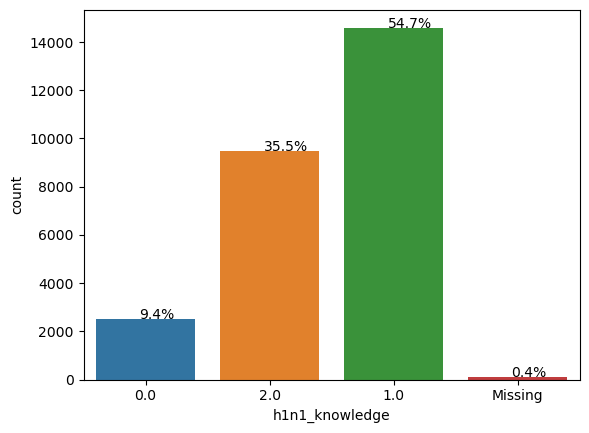

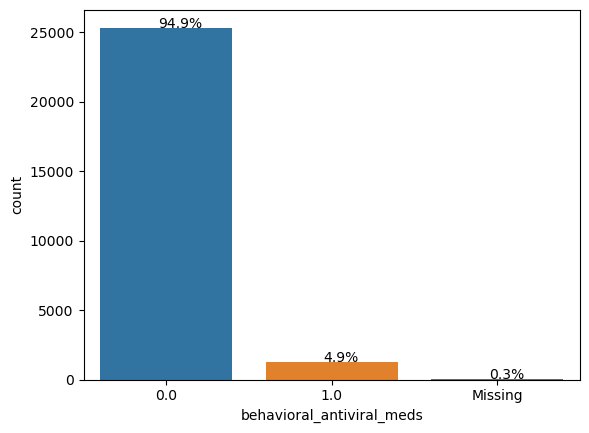

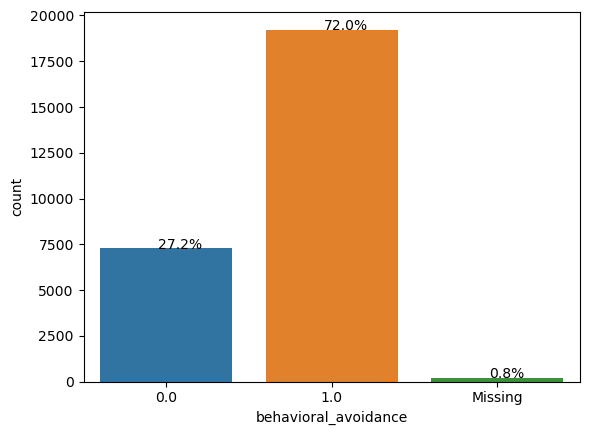

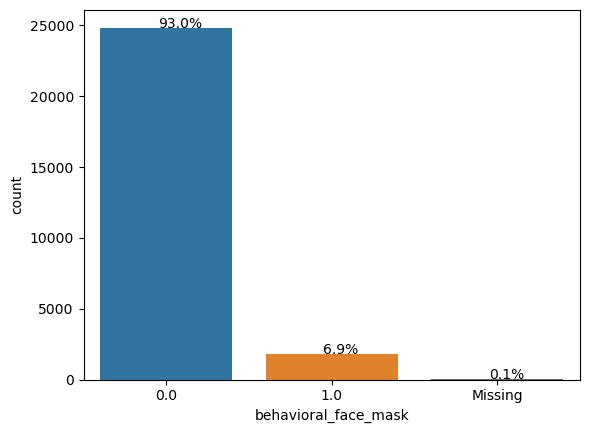

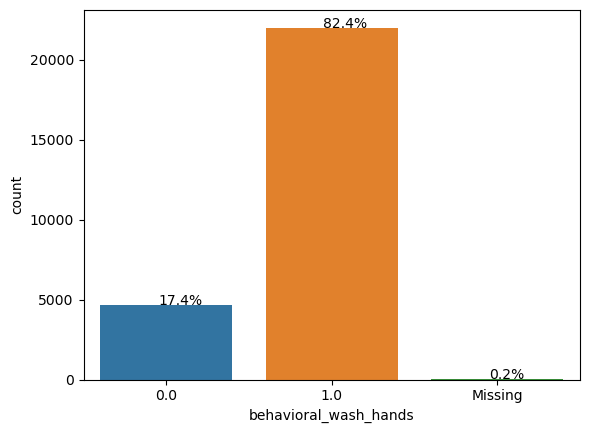

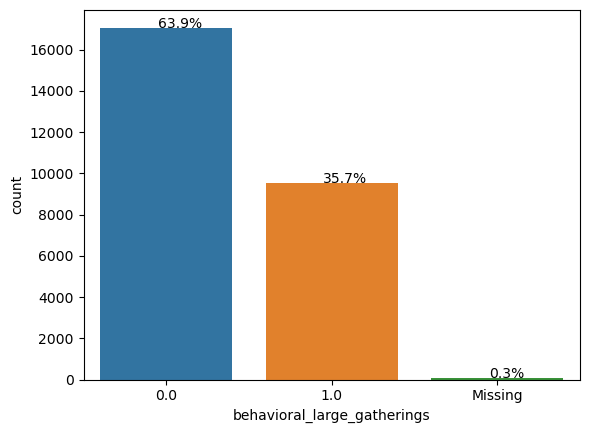

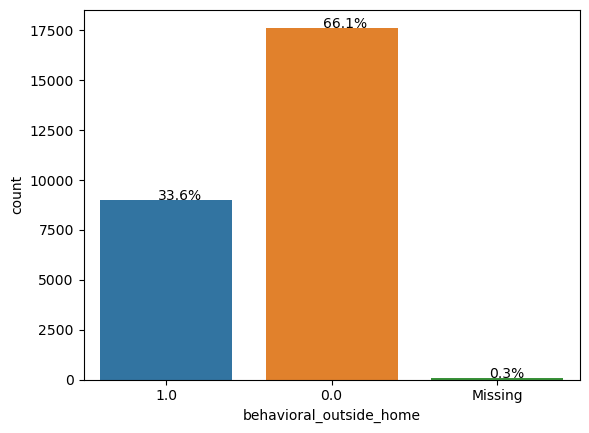

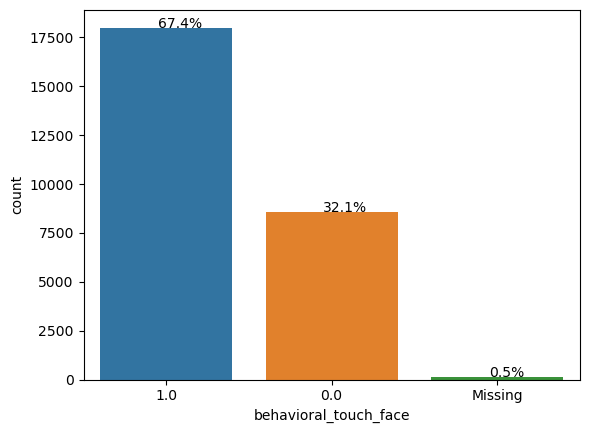

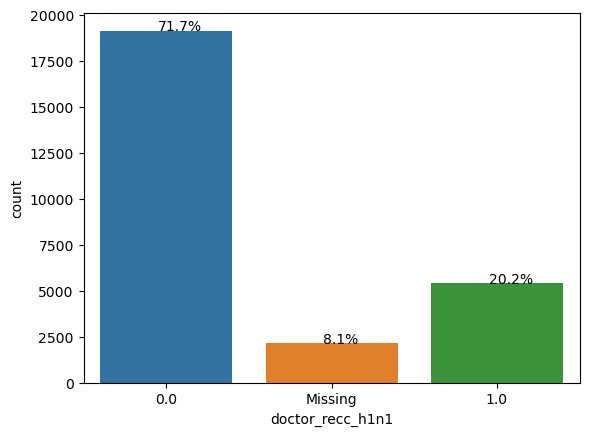

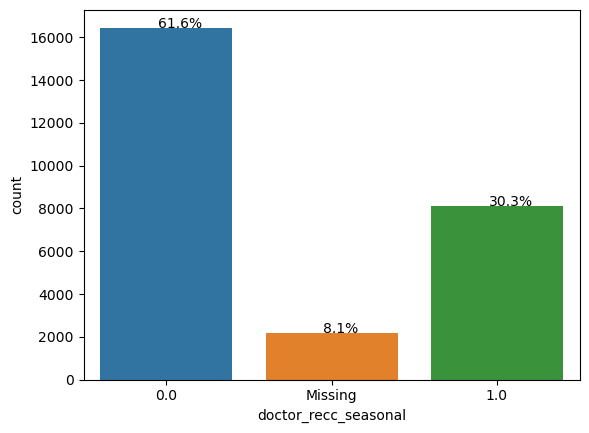

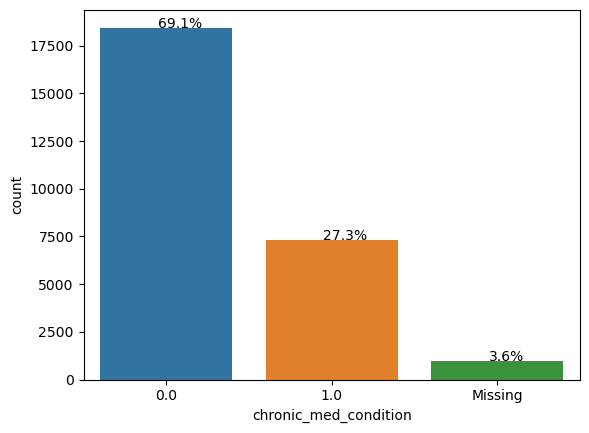

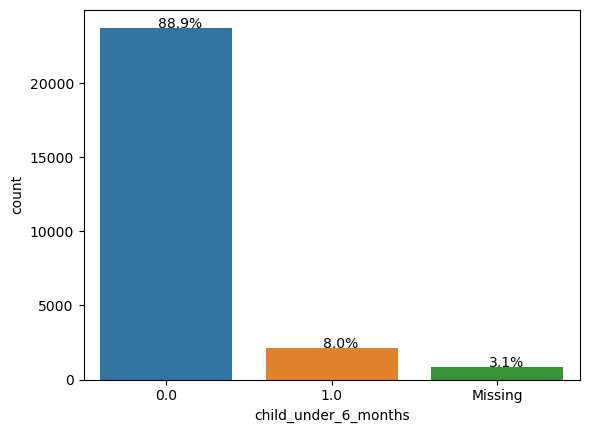

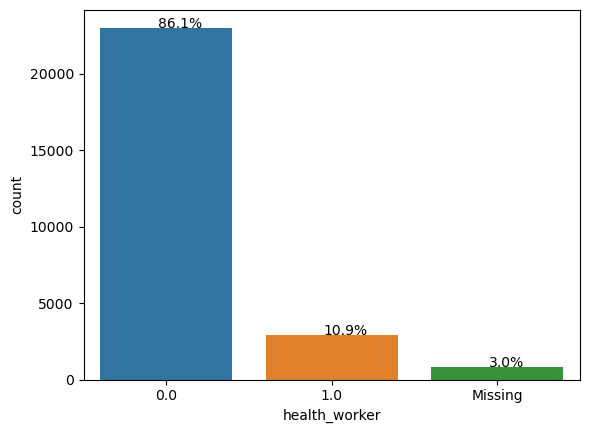

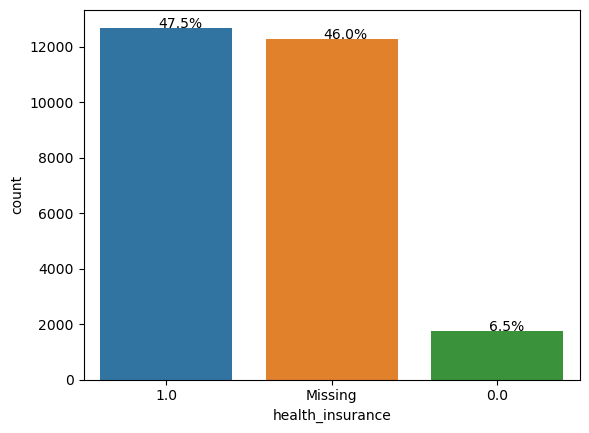

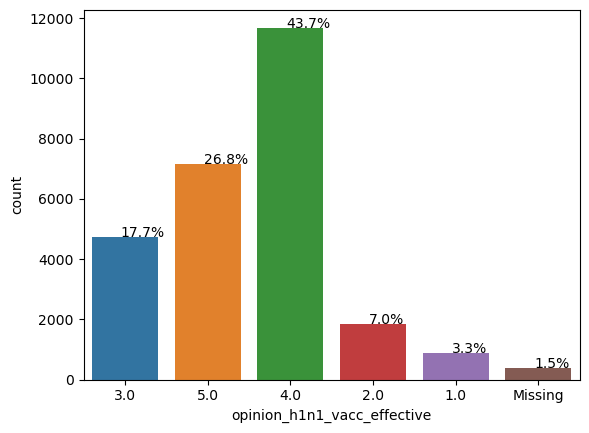

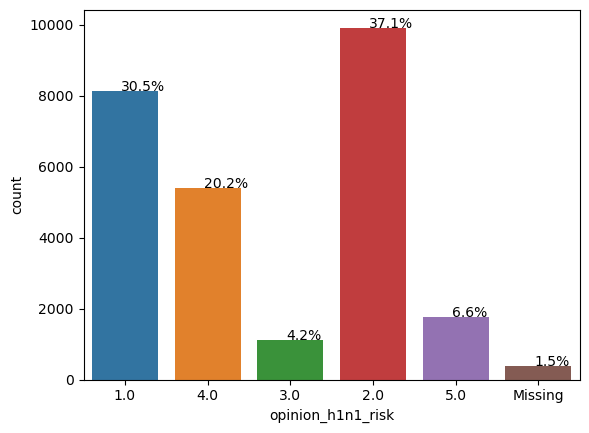

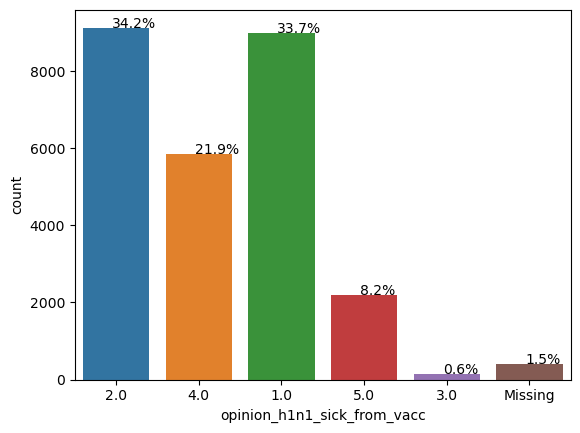

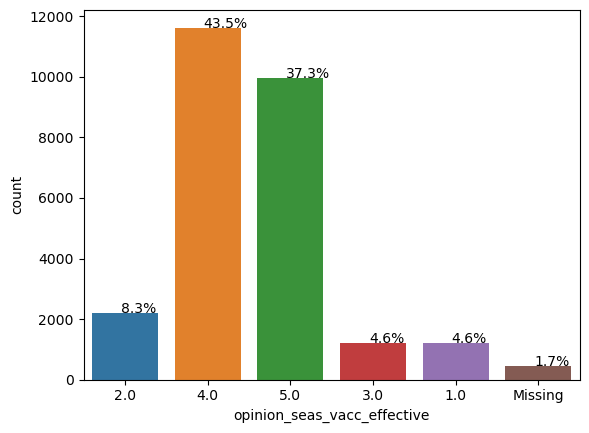

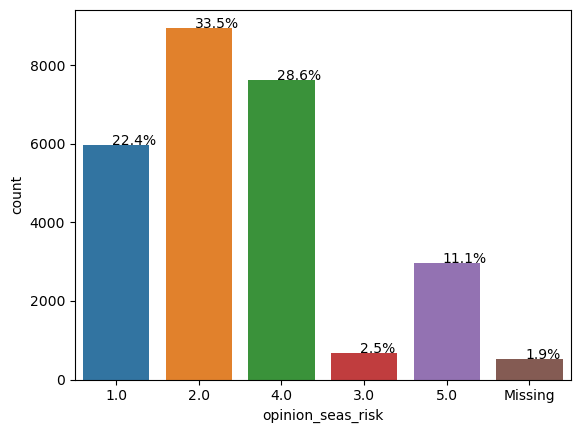

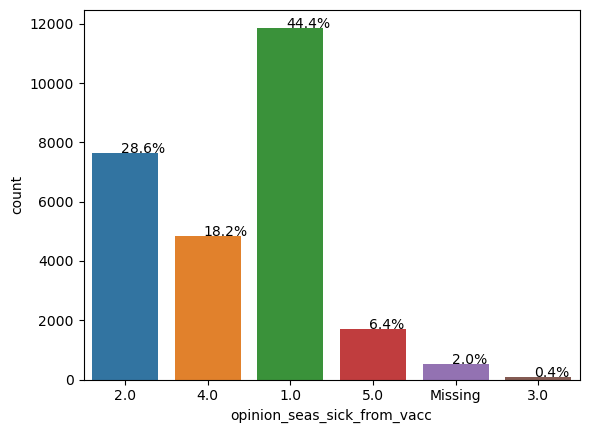

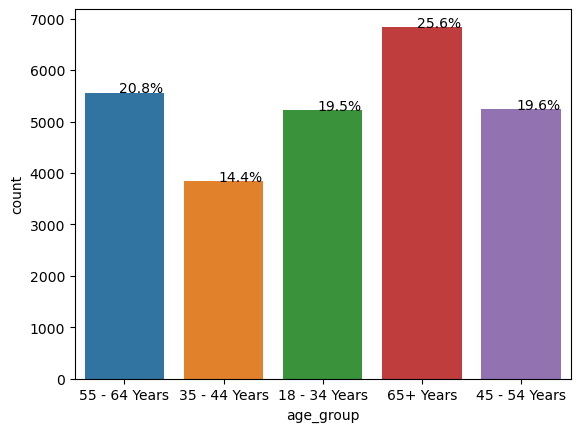

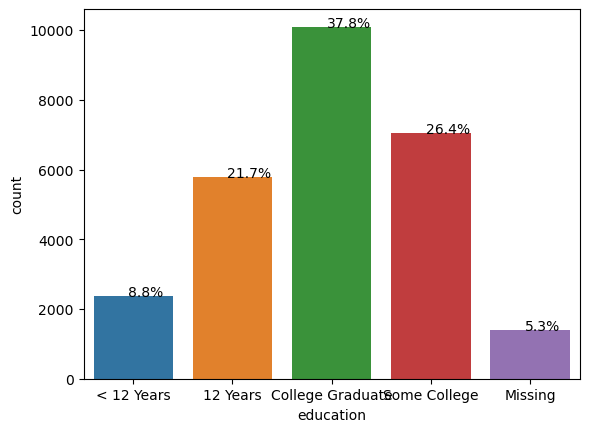

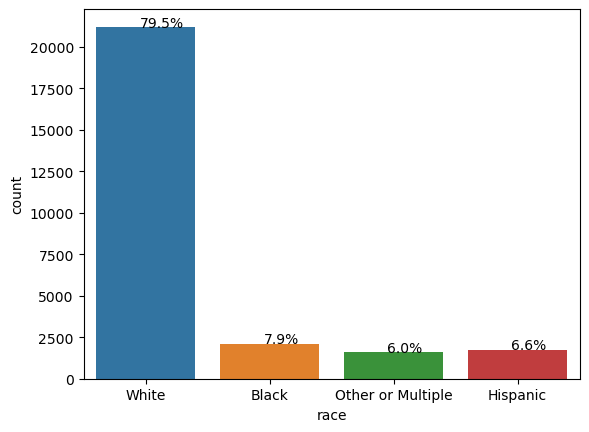

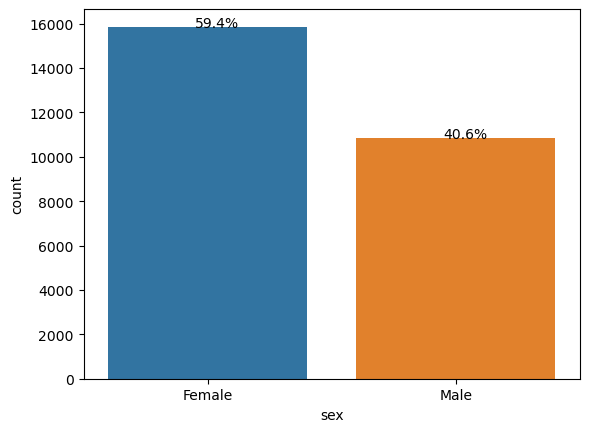

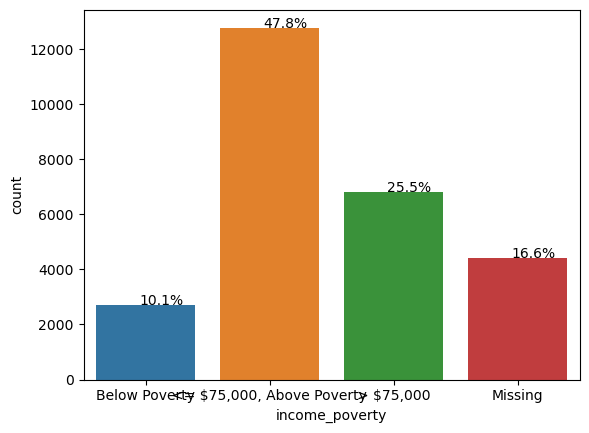

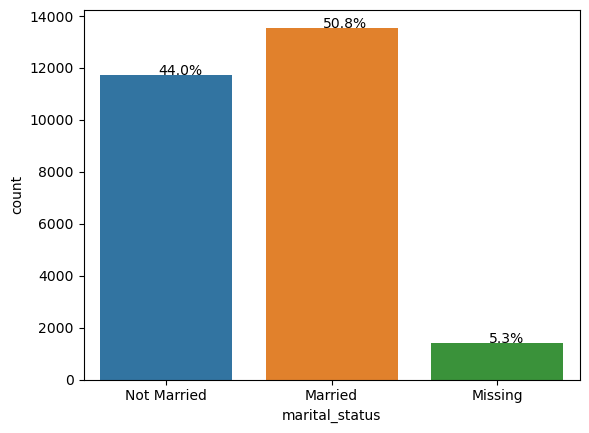

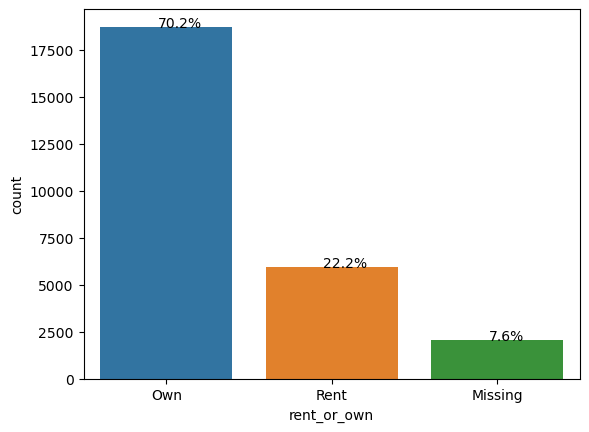

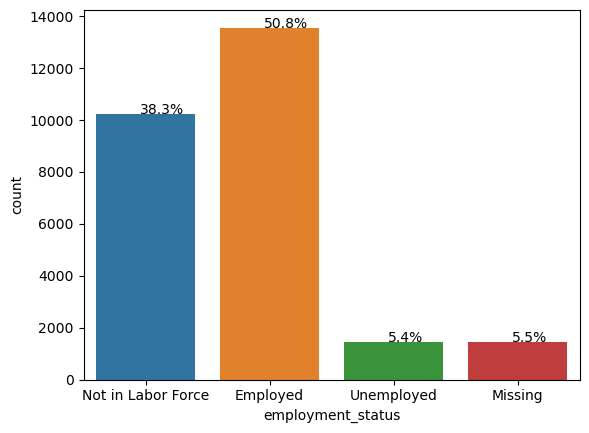

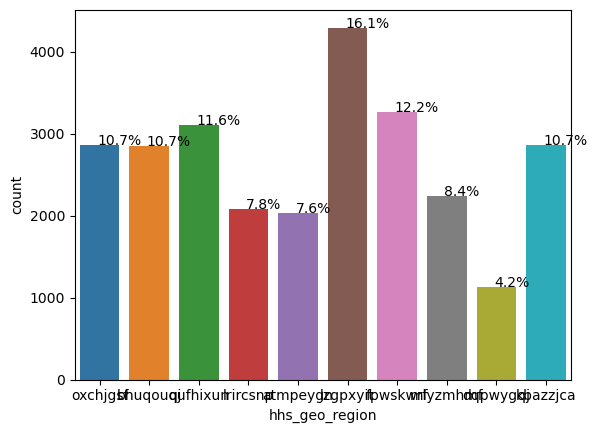

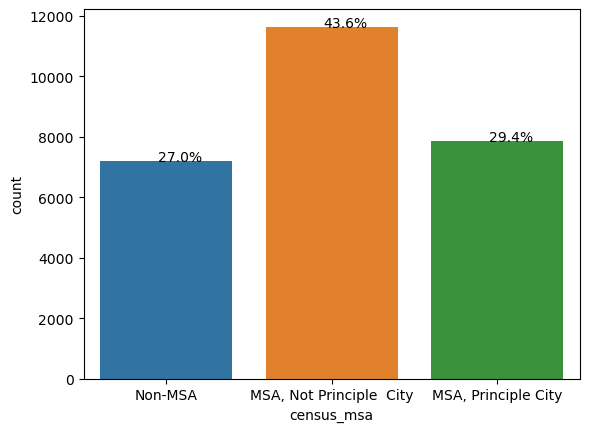

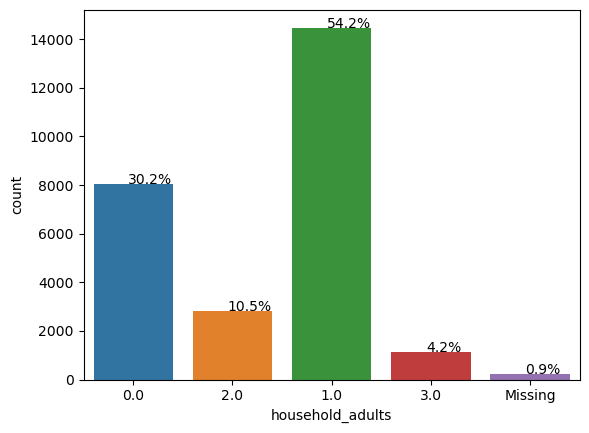

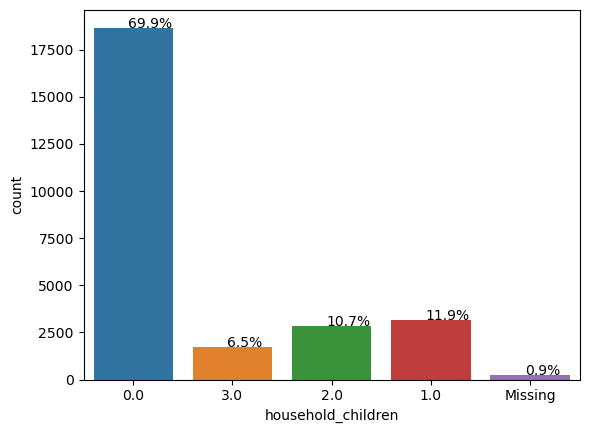

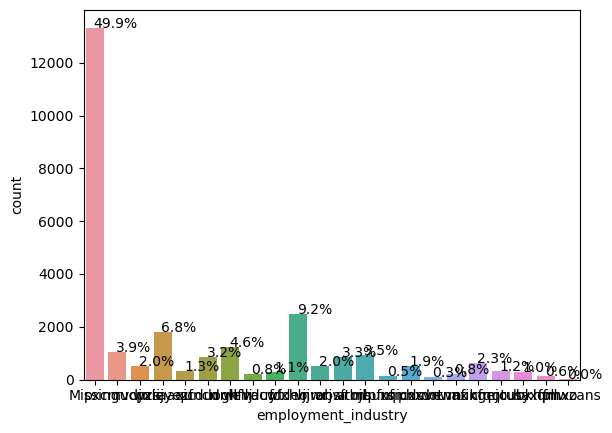

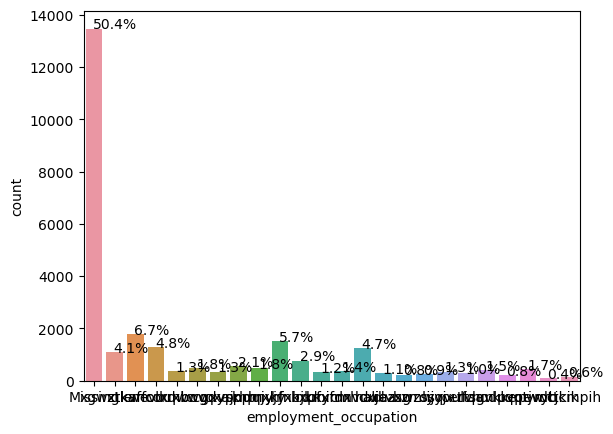

In [9]:
df_null = df
df_null = df_null.fillna("Missing")
num_cols = len(df_null.columns)
col_names = df_null.columns
for i in range(0, num_cols):
    ax = sns.countplot(x=col_names[i], data=df_null)
    total = len(df_null[col_names[i]].dropna())
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
    plt.show()

#### Get the percentage of null values in every dependent column

In [10]:
# Calculate the percentage of missing values in each column
missing_percentages = df2.isnull().sum() / len(df) * 100

# Print the results
print("Percentage of missing values in each column:")
print(missing_percentages)

Percentage of missing values in each column:
respondent_id                   0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education   

### Check if missing values in employment_occupation and employment_industry are missing at random.

Hypothesis: The missing values in employment_industry and employment_occupation are due to having Unemployed or Not in Labor Force values in employment_status

In [11]:
# Get rows with "not in labor force" or "unemployed" in employment_status and missing values in employment_industry and employment_occupation
mnar_count = ((df['employment_status'] == 'Not in Labor Force') | (df['employment_status'] == 'Unemployed')) & (df['employment_industry'].isna()) & (df['employment_occupation'].isna())
print(f"Number of rows with 'not in labor force' or 'unemployed' in employment_status and missing values in employment_industry and employment_occupation: {mnar_count.sum()}")

# Count the number of rows where employment_status is Unemployed or Not in Labor Force
print(f"Number of rows with 'not in labor force' or 'unemployed' in employment_status: {df[df['employment_status'].isin(['Unemployed', 'Not in Labor Force'])].shape[0]}")

Number of rows with 'not in labor force' or 'unemployed' in employment_status and missing values in employment_industry and employment_occupation: 11684
Number of rows with 'not in labor force' or 'unemployed' in employment_status: 11684


In [12]:
# Get number of missing values in employment status
print(f"Number of missing values in employment_status: {df['employment_status'].isnull().sum()}")

# Filter for rows where employment industry and occupation are missing 
missing_employment_ind_occ = df[df['employment_status'].isnull() & 
                                df['employment_industry'].isnull() & 
                                df['employment_occupation'].isnull()]

# Get the number of rows in the resulting DataFrame
print(f"Number of missing rows in employment_industry and employment_occupation when employment_status is null: {len(missing_employment_ind_occ)}")

Number of missing values in employment_status: 1463
Number of missing rows in employment_industry and employment_occupation when employment_status is null: 1463


The number of rows with 'not in labor force' or 'unemployed' in employment_status when employment_industry and employment_occupation is null matches the number of rows with 'not in labor force' or 'unemployed' in employment_status. Meanwhile, the number of missing values in employment_status also matches the number of missing values in employment_industry and employment_occupation when employment_status is null. Therefore, the missing values in employment_industry and employment_occupation are not missing at random.

## Data Imputation

### Impute null values in employment_industry and employment_occupation with 'Missing' class as it MNAR

Replace missing values in employment_occupation and employment_industry with "Missing" if "Not in labor force" or "Unemployed" employment_status

In [13]:
# replace missing values in employment_occupation and employment_industry with "Missing" if 'Not in labor force' or "Unemployed" employment_status
df.loc[df['employment_status'].isin(['Not in Labor Force', 'Unemployed']), ['employment_occupation', 'employment_industry']] = df.loc[df['employment_status'].isin(['Not in Labor Force', 'Unemployed']), ['employment_occupation', 'employment_industry']].fillna('Missing')

In [14]:
missing_rows_industry = len(df.loc[df['employment_industry'] == 'Missing'])
missing_rows_occupation = len(df.loc[df['employment_occupation'] == 'Missing'])
print("Number of rows with 'Missing' in employment_industry:", missing_rows_industry)
print("Number of rows with 'Missing' in employment_occupation:", missing_rows_occupation)

Number of rows with 'Missing' in employment_industry: 11684
Number of rows with 'Missing' in employment_occupation: 11684


MNAR rows have been imputed in the employment_industry and employment_occupation features.

### Remove column with too many missing values

The health_insurance column is removed as it contains 46% of missing values

In [15]:
df_dropped = df
df_dropped.drop(['health_insurance'], axis=1, inplace=True)

### Remove rows with too many missing values

In [16]:
df_dropped[df_dropped.isnull().sum(axis=1) > 18].shape[0]

56

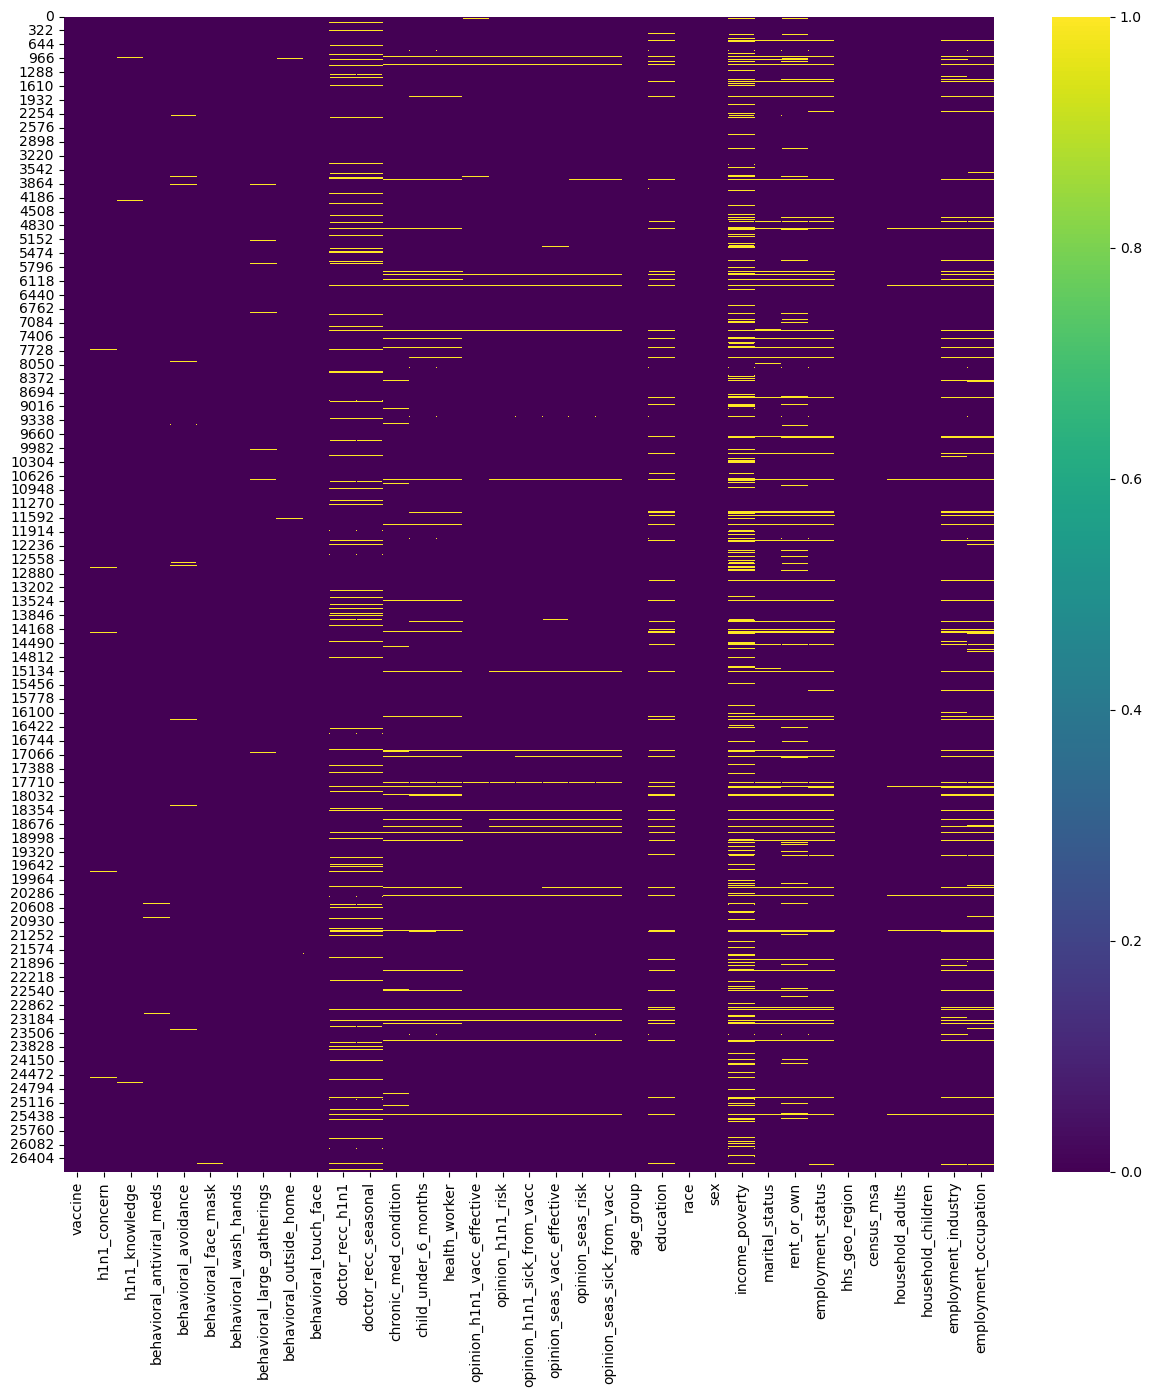

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(df_dropped.isnull(), cmap='viridis')
plt.show()

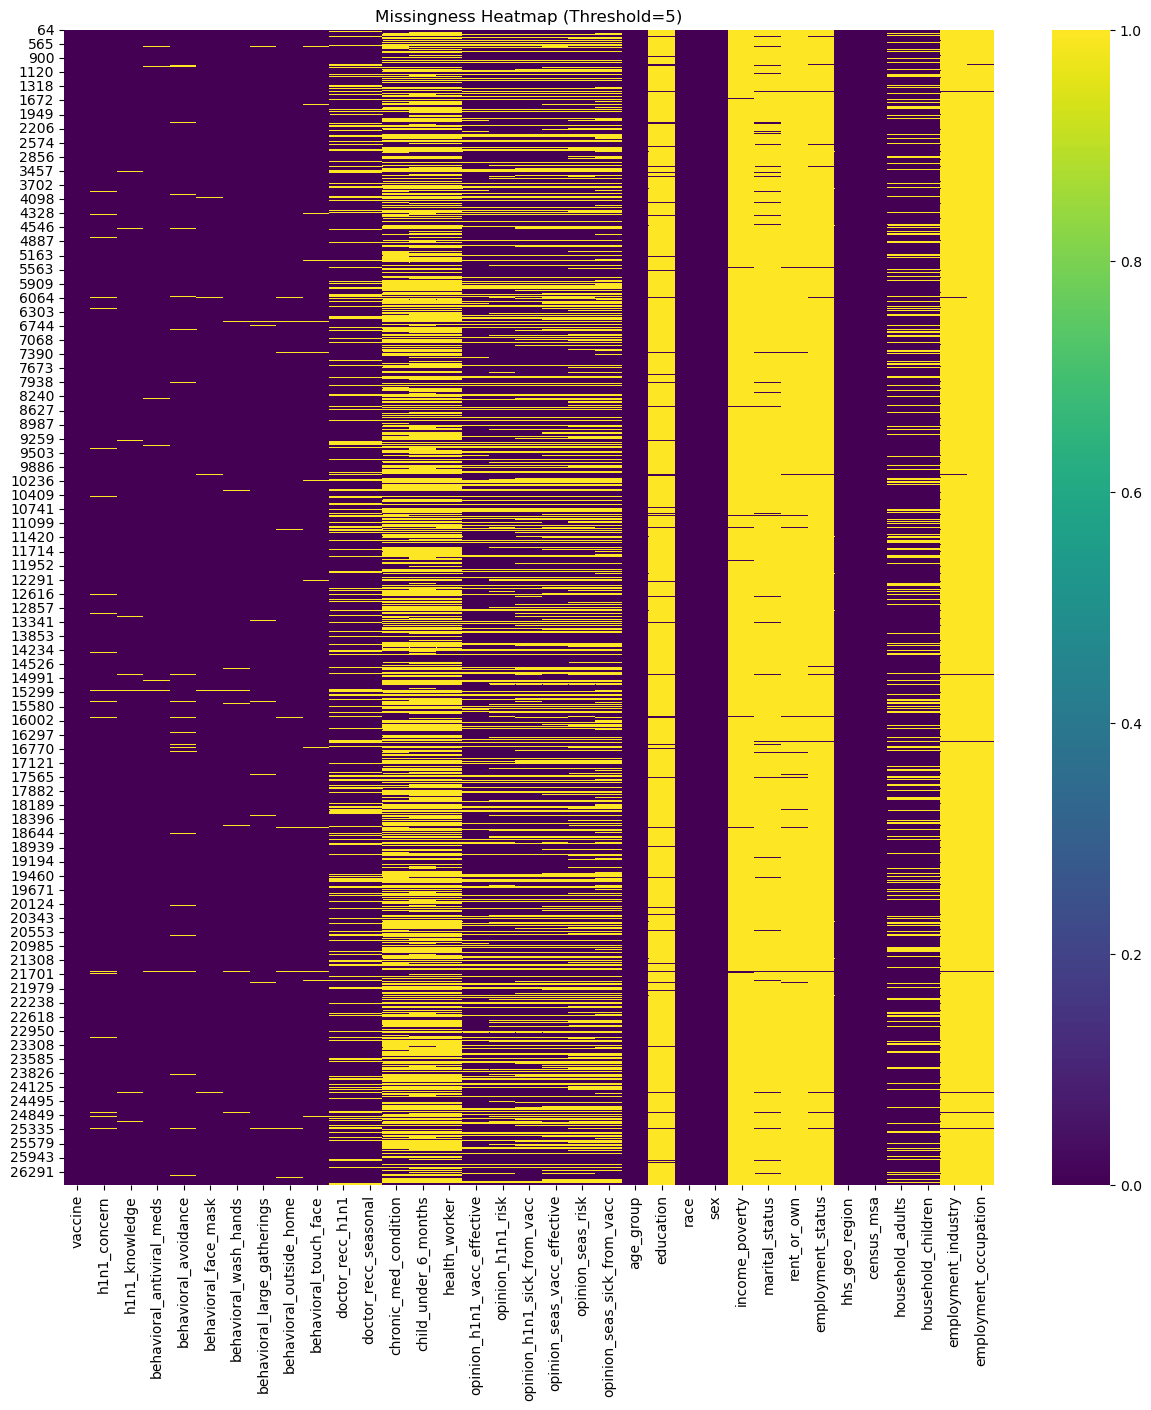

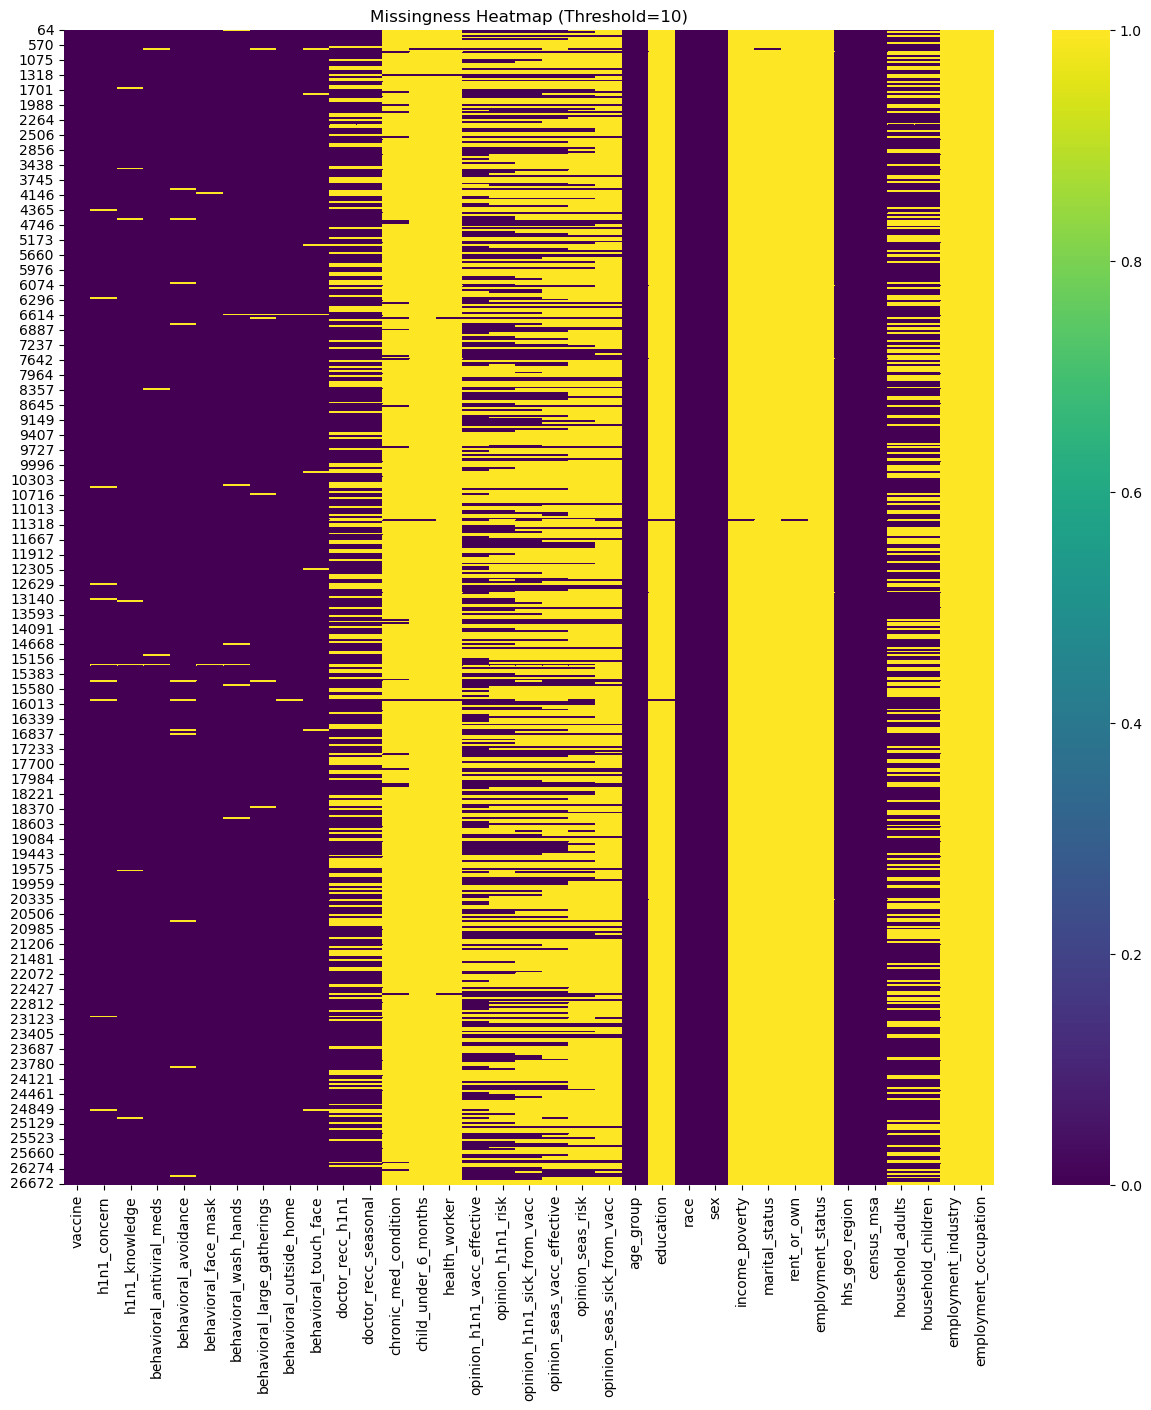

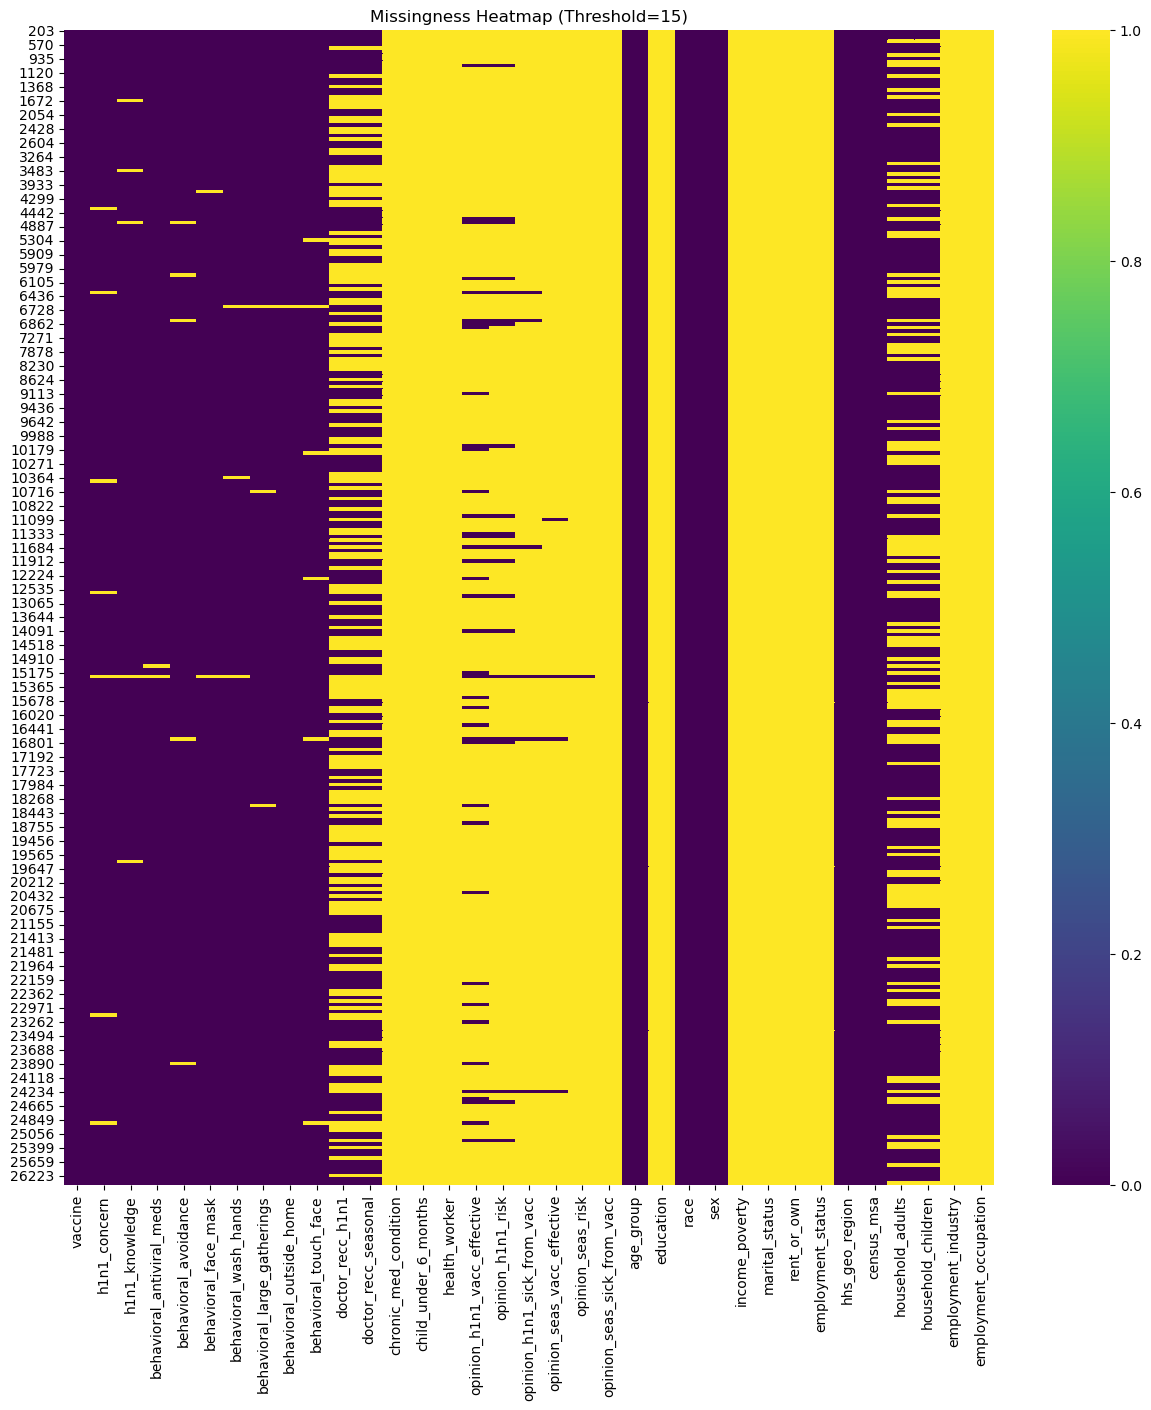

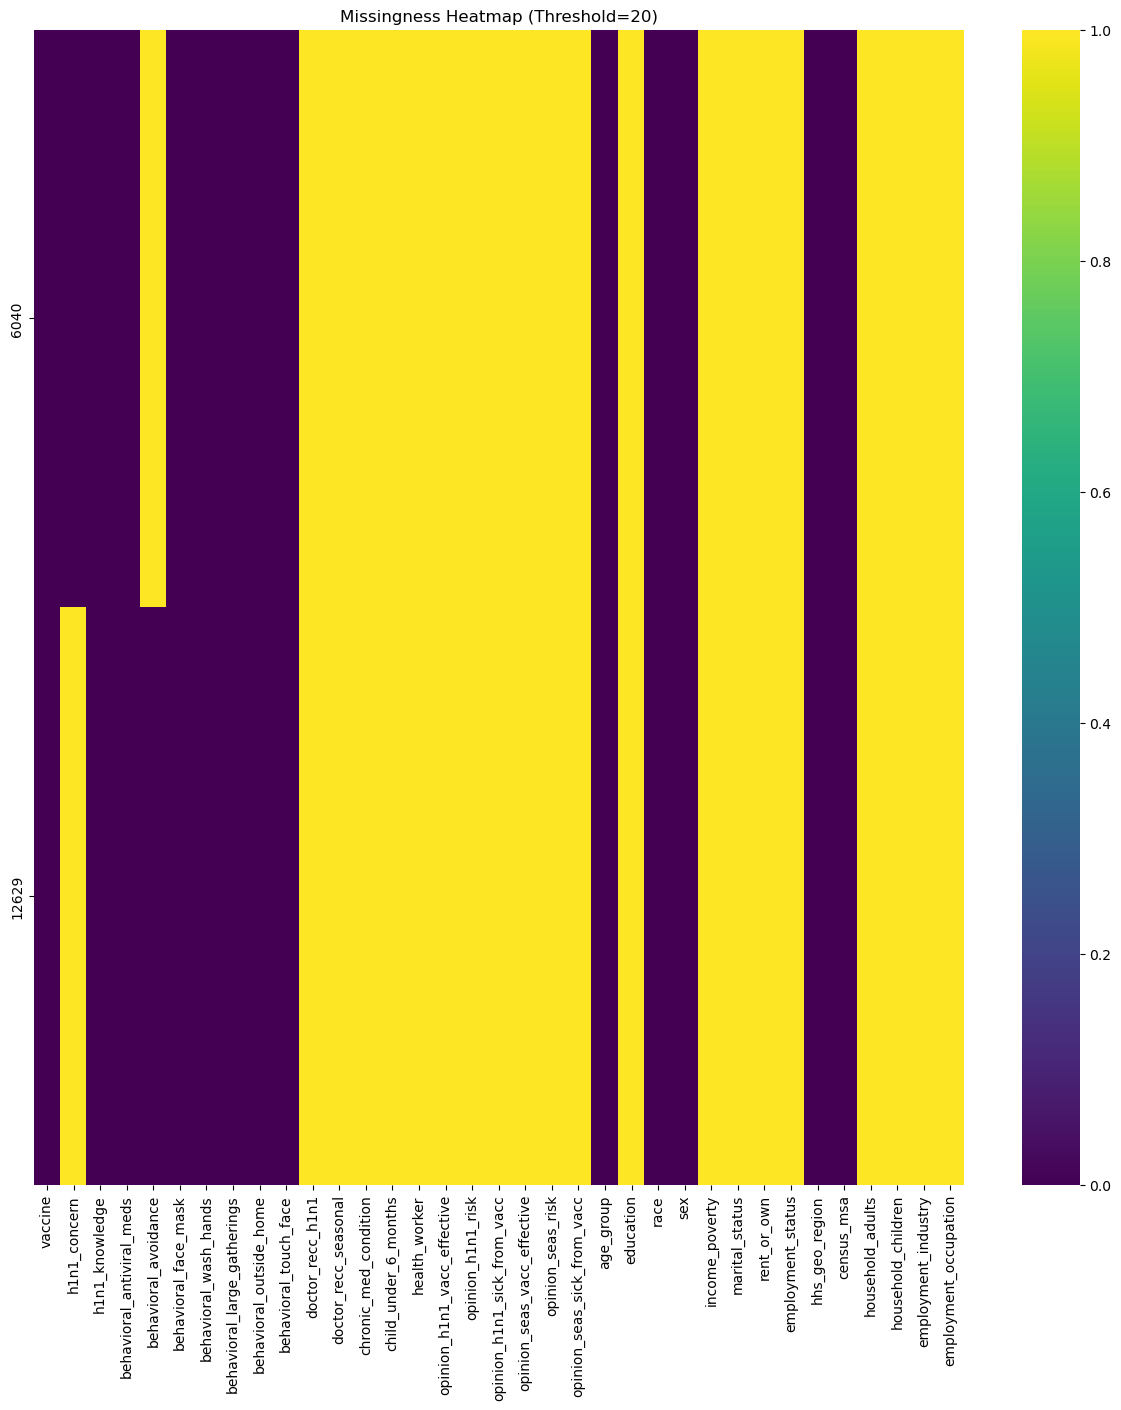

In [18]:
# create a list of threshold values to plot heatmaps for
thresholds = [5, 10, 15, 20]

# loop through the thresholds and plot a heatmap for each
for threshold in thresholds:
    # create a boolean mask of where values are missing
    mask = df_dropped.isnull().sum(axis=1) > threshold
    
    # create a heatmap of the missing values using the mask
    plt.figure(figsize=(15,15))
    sns.heatmap(df_dropped[mask].isnull(), cmap='viridis')
    plt.title(f"Missingness Heatmap (Threshold={threshold})")
    plt.show()


In [19]:
# Drop rows with more than 10 missing values
df_dropped = df_dropped.dropna(thresh=df.columns.shape[0] - 10)
print(df.shape[0] - df_dropped.shape[0])

# Check distribution of label data after removing rows
print(df_dropped['vaccine'].value_counts())

print(df['vaccine'].value_counts())

617
1    13158
0    12932
Name: vaccine, dtype: int64
1    13412
0    13295
Name: vaccine, dtype: int64


### Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Apply label encoding on categorical features that don't have an intrinsic order
label_encoding = ['employment_industry', 'employment_occupation', 'census_msa', 'hhs_geo_region', 'employment_status', 'rent_or_own', 'marital_status', 'race', 'sex']
for feature in label_encoding:
    le = LabelEncoder()
    df_dropped[feature] = le.fit_transform(df_dropped[feature])

# Apply ordinal encoding on categorical features that have an intrinsic order
ordinal_encoding = {'age_group': ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years', 'missing'],
                    'education': ['< 12 Years', '12 Years', 'Some College', 'College Graduate', 'missing'],
                    'income_poverty': ['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', 'missing']}
ordinal_encoder = OrdinalEncoder(categories=[ordinal_encoding['age_group'], ordinal_encoding['education'], ordinal_encoding['income_poverty']])
df_dropped[['age_group', 'education', 'income_poverty']] = ordinal_encoder.fit_transform(df_dropped[['age_group', 'education', 'income_poverty']])

C:\Users\justi\AppData\Local\Temp\ipykernel_15836\508946905.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped[feature] = le.fit_transform(df_dropped[feature])


ValueError: Input contains NaN

### Data Imputation

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Perform multiple imputation
imp = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imp.fit_transform(df_dropped), columns=df_dropped.columns)

# Check for missing values
print(df_imputed.isnull().sum())

ValueError: could not convert string to float: '55 - 64 Years'

### Merging h1n1 and seasonal vaccination opinions into vaccination opinions

In [ ]:
# Combine the H1N1 and seasonal vaccine columns and get the average
effective_avg = (df['opinion_h1n1_vacc_effective'] + df['opinion_seas_vacc_effective']) / 2
risk_avg = (df['opinion_h1n1_risk'] + df['opinion_seas_risk']) / 2
sick_avg = (df['opinion_h1n1_sick_from_vacc'] + df['opinion_seas_sick_from_vacc']) / 2

# Add the new columns to the DataFrame
df['vacc_effective_avg'] = effective_avg.astype(int)
df['vacc_risk_avg'] = risk_avg.astype(int)
df['sick_from_vacc_avg'] = sick_avg.astype(int)

# Drop the old columns
df = df.drop(['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1, inplace=True)